**Useful Imports**

In [2]:
import nibabel as nb
import numpy as np
import matplotlib.pyplot as plt
import csv

**Variable Declaration**

In [3]:
INFO = 1 # For debugging

# Change path to find nifti files on local computer
data = []
with open('scans.csv', newline='') as scanfile:
    reader = csv.DictReader(scanfile)
    for row in reader:
        dataRow = [ row['file_name'], float(row['rg_value']), [], 0, 0, 0, 0 ]
        data.append(dataRow)

**Extract Images**

In [4]:
idx = 0
for d in data:
    data[idx][2] = np.asarray(nb.load(d[0]).dataobj)
    idx += 1


**Plot Images**

In [5]:
slice = 40 # Adjust this to change slice plotted

# # Print preview of 4 scans with the various receiver gain
# fig, frame = plt.subplots(2, 2, figsize=(9,9))
# z1 = np.rot90(data[0][2][:,slice,:])
# pos1 = frame[0, 0].imshow(z1)
# frame[0, 0].set_title("PDW scan with {} receiver gain".format(data[0][1]))
# fig.colorbar(pos1, ax=frame[0,0])

# z2 = np.rot90(data[1][2][:,slice,:])
# pos2 = frame[1, 0].imshow(z2)
# frame[1, 0].set_title("PDW scan with {} receiver gain".format(data[1][1]))
# fig.colorbar(pos2, ax=frame[1,0])

# z3 = np.rot90(data[2][2][:,slice,:])
# pos3 = frame[0, 1].imshow(z3)
# frame[0, 1].set_title("PDW scan with {} receiver gain".format(data[2][1]))
# fig.colorbar(pos3, ax=frame[0,1])

# z4 = np.rot90(data[3][2][:,slice,:])
# pos4= frame[1, 1].imshow(z4)
# frame[1, 1].set_title("PDW scan with {} receiver gain".format(data[3][1]))
# fig.colorbar(pos4, ax=frame[1,1])
# fig.suptitle("Plot of slice " + str(slice) + " for the scans used for analysis")
# plt.show()

In [6]:
avgData = [ [ 101, np.zeros(data[0][2].shape), 0 ], [ 50.8, np.zeros(data[0][2].shape), 0 ] ]

for d in data:
    if( d[1] == 101.0 ):
        avgData[0][1] = np.add(avgData[0][1], d[2])
        avgData[0][2] += 1
    elif( d[1] == 50.8 ):
        avgData[1][1] = np.add(avgData[1][1], d[2])
        avgData[1][2] += 1
        
idx = 0
for rg in avgData:
    avgData[idx][1] = rg[1]/rg[2]
    idx += 1

**Plot Results**

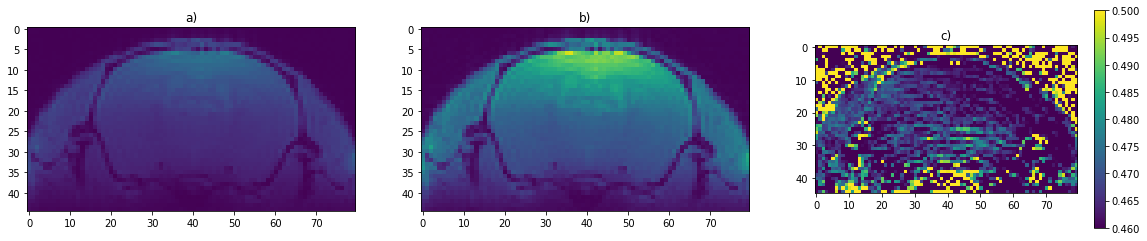

In [19]:
img_ratio = avgData[1][1] / avgData[0][1]
fig, frame = plt.subplots(1, 3, figsize=(20,4))
y1 = np.rot90(avgData[1][1][:,slice,:])
pos5 = frame[0].imshow(y1, vmax=1.5e8, vmin=0)
frame[0].set_title("a)")
# fig.colorbar(pos5, ax=frame[0])

y2 = np.rot90(avgData[0][1][:,slice,:])
pos6 = frame[1].imshow(y2, vmax=1.5e8, vmin=0)
frame[1].set_title("b)")
# fig.colorbar(pos6, ax=frame[1])

y3 = np.rot90(img_ratio[:,slice,:])
pos7 = frame[2].imshow(y3, vmax=0.50, vmin=0.46)
frame[2].set_title("c)")
plt.colorbar(pos7)
plt.savefig("/home/cedric/Documents/Capstone/MidProjectReport/figure4.jpg")
# plt.show()

**Computing the Ratio**

In [7]:
img_ratio = avgData[1][1] / avgData[0][1]
img_ratio.shape

(80, 90, 45)

**Plotting the Ratioed Image**

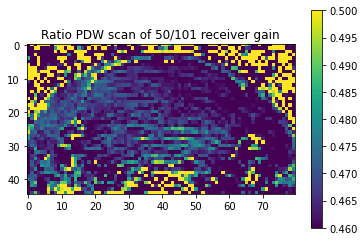

In [12]:
fig = plt.figure(1)
z1 = np.rot90(img_ratio[:,slice,:])
pos7 = plt.imshow(z1, vmax=0.50, vmin=0.46)
plt.colorbar(pos7)
plt.title("Ratio PDW scan of 50/101 receiver gain")
plt.savefig("/home/cedric/Documents/Capstone/MallarPresentation/50to101ratio_beforemask.jpg")
#plt.show()


**Averaging the Ratio**

In [13]:
np.mean(img_ratio)

0.4728237277324717